# Numerical Methods

Most differential equations cannot be solved explicitly using elementary functions however we can always approximate solutions using [numerical methods](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations). The order of a numerical method describes how much the error decreases as the step size decreases. Higher order methods are more accurate however they require more computations to implement. [Euler's method](https://en.wikipedia.org/wiki/Euler_method) is the simplest method however the [Runge-Kutta method (RK4)](https://en.wikipedia.org/wiki/Runge–Kutta_methods#The_Runge–Kutta_method) is the most commonly used in practice.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Setup

Throughout this section, let $y(t)$ denote the unique solution of a first order differential equation with an initial condition:

$$
y' = f(t,y) \ , \ \ y(t_0) = y_0
$$

A [numerical method](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) is an algorithm which approximates the solution $y(t)$. In particular, given a sequence of values $t_1,t_2,t_3,\dots$, a numerical method computes a sequence $y_1,y_2,y_3,\dots$ which approximates the solution at the given $t$ values:

$$
y_n \approx y(t_n)
$$

The $t$ values are usually chosen to be equally spaced with step size $h$:

$$
t_n = t_0 + n h
$$

All the numerical methods we consider below are examples of [explicit Runge-Kutta methods](https://en.wikipedia.org/wiki/Runge–Kutta_methods#Explicit_Runge–Kutta_methods) which follow the same general procedure:

1. Given a point $(t_n,y_n)$, approximate slopes $k_1,\dots,k_s$ nearby using $f(t,y)$.
2. Compute an average $\tilde{k}$ of the slopes $k_1,\dots,k_s$.
3. Compute the next value: $y_{n+1} = y_n + \tilde{k} h$.
4. Repeat!

A method which computes $s$ slopes $k_1,\dots,k_s$ is called an $s$-stage method and the formula for the average $\tilde{k}$ depends on the method.

## Euler's Method

The simplest numerical method is [Euler's method](https://en.wikipedia.org/wiki/Euler_method) which uses the tangent line approximation:

$$
y(t + h) \approx y(t) + y'(t) h
$$

Euler's method is given by the recursive formula:

\begin{align}
h &= t_{n+1} - t_n \\\
k_1 &= f(t_n,y_n) \\\
y_{n+1} &= y_n + k_1 h
\end{align}

Write a function called `odeEuler` which takes input parameters `f`, `t` and `y0` where:

* `f` is a function which represents the right side of the equation $y' = f(t,y)$
* `t` is a 1D NumPy array
* `y0` is an intial value $y(t_0)=y_0$ where $t_0$ is the value `t[0]`

The function `odeEuler` returns a 1D NumPy array of $y$ values which approximate the solution $y(t)$ using Euler's method.

In [3]:
def odeEuler(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        y[n+1] = y[n] + k1*h
    return y

Consider the equation

$$
y' = y \cos(t) \ , \ \ y(0)=1
$$

The equation is separable and we solve using separation of variables:

$$
y(t) = e^{\sin(t)}
$$

Plot the approximation by Euler's method with step size $h=0.25$ and plot the exact solution on the interval $0 \leq t \leq 2 \pi$.

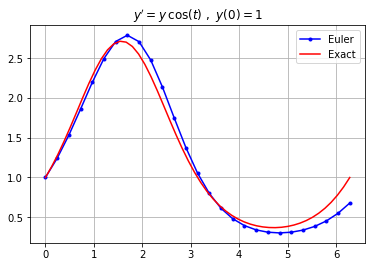

In [4]:
f = lambda t,y: y*np.cos(t)
y0 = 1; t0 = 0; tf = 2*np.pi;
h = 0.25; N = int((tf - t0)/h) + 1;
t = np.linspace(t0,tf,N+1)
y = odeEuler(f,t,y0)
plt.plot(t,y,'b.-')
t_exact = np.linspace(t0,tf,50)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t_exact,y_exact,'r')
plt.grid(True), plt.title("$y' = y \, \cos(t) \ , \ y(0)=1$")
plt.legend(["Euler","Exact"])
plt.show()

## Heun's Method

Euler's method uses the degree 1 Taylor polynomial (ie. the tangent line) to approximate $y(t)$. [Heun's method](https://en.wikipedia.org/wiki/Heun%27s_method) is constructed from the degree 2 Taylor polynomial:

$$
y(t + h) \approx y(t) + y'(t)h + \frac{y''(t)}{2}h^2
$$

We only want to use $y' = f(t,y)$ in our approximation therefore introduce the forward difference formula to approximate $y''$ in terms of $y'$:

$$
y''(t) \approx \frac{y'(t + h) - y'(t)}{h}
$$

Put these together to approximate $y(t + h)$:

$$
y(t+h) \approx y(t) + \frac{y'(t + h) + y'(t)}{2}h
$$

Use Euler's method $y(t+h) \approx y(t) + y'(t)h$ to approximate:

$$
y'(t+h) = f(t+h,y(t+h)) \approx f(t+h,y(t)+y'(t)h)
$$

Heun's method is given by the 2-stage recursive formula:

\begin{align}
h &= t_{n+1} - t_n \\\
k_1 &= f(t_n,y_n) \\\
k_2 &= f(t_n + h,y_n + k_1 h) \\\
y_{n+1} &= y_n + \left( \frac{k_1 + k_2}{2} \right)h
\end{align}

Write a function called `odeHeun` which takes input parameters `f`, `t` and `y0` where:

* `f` is a function which represents the right side of the equation $y' = f(t,y)$
* `t` is a 1D NumPy array
* `y0` is an intial value $y(t_0)=y_0$ where $t_0$ is the value `t[0]`

The function `odeHeun` returns a 1D NumPy array of $y$ values which approximate the solution $y(t)$ using Heun's method.

In [4]:
def odeHeun(f,t,y0):
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        h = t[n+1] - t[n]
        k1 = f(t[n],y[n])
        k2 = f(t[n+1],y[n] + k1*h)
        y[n+1] = y[n] + (k1 + k2)/2*h
    return y

Let us again consider the equation

$$
y' = y \cos(t) \ , \ \ y(0)=1
$$

and the exact solution

$$
y(t) = e^{\sin(t)}
$$

Plot the approximation using both Euler's method and Heun's method with step size $h=0.25$ and plot the exact solution on the interval $0 \leq t \leq 2 \pi$.

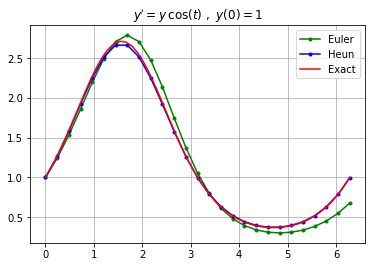

In [5]:
f = lambda t,y: y*np.cos(t)
y0 = 1; t0 = 0; tf = 2*np.pi;
h = 0.25; N = int((tf - t0)/h) + 1;
t = np.linspace(t0,tf,N+1)
y_euler = odeEuler(f,t,y0); plt.plot(t,y_euler,'g.-');
y_heun = odeHeun(f,t,y0); plt.plot(t,y_heun,'b.-');
t_exact = np.linspace(t0,tf,50)
y_exact = np.exp(np.sin(t_exact))
plt.plot(t_exact,y_exact,'r')
plt.grid(True), plt.title("$y' = y \, \cos(t) \ , \ y(0)=1$")
plt.legend(["Euler","Heun","Exact"])
plt.show()

Heun's method computes a better approximation compared to Euler's method as expected.

## RK4 Method

*Under construction*

## Error Analysis

### Order of Accuracy

Let $y_1$ be the approximation of $y(t_1)$ by one step of some numerical method using step size $h = t_1 - t_0$. The **(local) truncation error** (for the given differential equation and method) is

$$
E(h) = | y(t_1) - y_1 |
$$

The word *local* means we are looking at just one step of the method and the word *truncation* has to do with truncating the Taylor series.

Most numerical methods are based on Taylor series therefore the error may be expressed in terms of Taylor's theorem. For example, consider the Taylor series up to order $p$ evaluated at $t_1 = t_0 + h$:

$$
y(t_1) = y(t_0) + y'(t_0)h + \cdots + \frac{y^{(p)}(t_0)}{p!} h^p + \frac{y^{(p+1)}(c)}{(p+1)!} h^{p+1}
$$

for some $c \in [t_0,t_1]$. If a numerical method computes $y(t_1)$ using the Taylor polynomial of degree $p$ then the local truncation error is

$$
E(h) = | y(t_1) - y_1 | = \frac{| y^{(p+1)}(c) |}{(p+1)!} h^{p+1}
$$

Therefore we can roughly say that a numerical method is order $p$ if the local truncation error looks like $Ch^{p+1}$ for some constant $C$.

More precisely, a numerical method is **order** $p$ if the local truncation error satisfies

$$
E(h) \leq C h^{p+1}
$$

for *any* equation $y' = f(t,y)$, $y(t_0)=y_0$. The constant $C$ depends on $f$. Note that the order is a positive integer.

It is usually quite difficult to determine the order of a numerical method given the formula. Instead, we can determine the order experimentally. The idea is that the local truncation error should satisfy

$$
E(h) \approx C h^{p+1}
$$

when applied to most differential equations. Therefore we may observe the slope in the loglog plot:

$$
\log(E(h)) \approx (p+1) \log(h) + \log(C)
$$

The procedure to experimentally determine the order $p$ of a numerical method is:

1. Apply the numerical method to the equation $y' = y,y(0)=1$ for different steps size $h_1$ and $h_2$.
2. Compute the local truncation errors $E(h_1)$ and $E(h_2)$ using the exact solution $y(t)=e^t$.
3. Compute the slope of the loglog plot:

$$
p+1 \approx \frac{\log(E(h_2)) - \log(E(h_1))}{\log(h_2) - \log(h_1)}
$$

### Examples

#### Euler's Method is Order 1

Euler's method is built using the degree 1 Taylor polynomial. Talyor's theorem says

$$
y(t_1) = y(t_0) + y'(t_0)(t_1 - t_0) + \frac{y''(c)}{2}(t_1 - t_0)^2
$$

for some $c \in [t_0,t_1]$. Therefore, if $|y''(t)|\leq K_2$ for all $t \in [t_0,t_1]$, then

$$
E(h) = \left| \frac{y''(c)}{2}(t_1 - t_0)^2 \right| \leq \frac{K_2 h^2}{2}
$$

Therefore Euler's method is order 1. Let's verify the order of Euler's method experimentally by plotting the local truncation error for Euler's method applied to $y'=y$, $y(0)=1$.

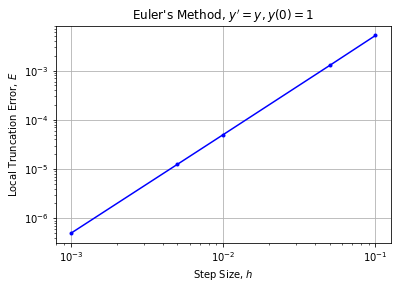

In [5]:
f = lambda t,y: y
y0 = 1;
h = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(0,len(h)):
    y = odeEuler(f,[0,h[n]],y0)
    y1 = y[1]
    y1_exact = np.exp(h[n])
    E[n] = np.abs(y1_exact - y1)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("Euler's Method, $y'=y,y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

The loglog plot has slope 2 as expected from the error formula and we verify that Euler's method is order 1.

#### Heun's Method is Order 2

Heun's method is built using the degree 2 Taylor polynomial therefore we expect the method to be order 2. Let's verify the order of Heun's method experimentally by plotting the local truncation error for Heun's method applied to $y'=y$, $y(0)=1$.

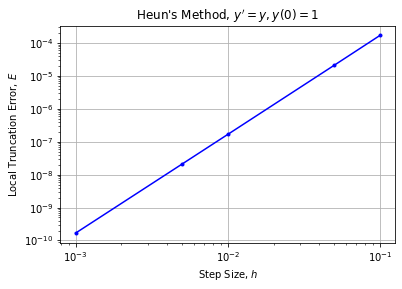

In [7]:
f = lambda t,y: y
y0 = 1;
h = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))
for n in range(0,len(h)):
    y = odeHeun(f,[0,h[n]],y0)
    y1 = y[1]
    y1_exact = np.exp(h[n])
    E[n] = np.abs(y1_exact - y1)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("Heun's Method, $y'=y,y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

The loglog plot has slope 3 therefore Heun's method is order 2 as expected since Heun's method is built from the degree 2 Taylor approximation.

#### RK4 is Order 4

*Under construction*

## scipy.integrate.odeint

The main ODE solver in SciPy is `scipy.integrate.odeint`. Just like our functions `odeEuler` and others defined above, the function `odeint` takes input parameters `f`, `y0` and `t` where:

* `f` is a function which represents the right side of the equation $y' = f(y,t)$ (note the order $y$ then $t$)
* `y0` is an intial value $y(t_0)=y_0$ where $t_0$ is the value `t[0]`
* `t` is a 1D NumPy array

The function `odeint` returns a 1D NumPy array of $y$ values which approximate the solution $y(t)$. Note that our notation for first order equations (and the notation used by most mathematicians) is $y'=f(t,y)$ with $t$ appearing first and then $y$. The function `odeint` **expects a different order of variables** with $y$ appearing first and then $t$ in the equation $y' = f(y,t)$.

For example, use `odeint` to approximate the solution of $y' = \sin(y^2) + \cos(t)$ for various initial values.

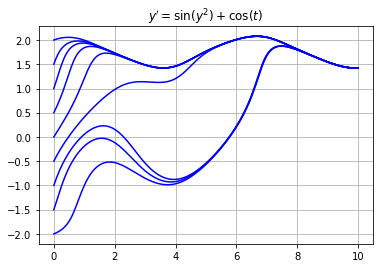

In [8]:
import scipy.integrate as spi

f = lambda y,t: np.sin(y**2) + np.cos(t)
t = np.linspace(0,10,200)
for y0 in np.linspace(-2,2,9):
    y = spi.odeint(f,y0,t)
    plt.plot(t,y,'b')

plt.grid(True), plt.title("$y' = \sin(y^2) + \cos(t)$")
plt.show()

## Exercises

**Exercise 1.** Write a function called `odeMidpoint` which implements the midpoint method:

\begin{align}
k_1 &= f(t_n,y_n) \\\
k_2 &= f(t_n + h/2, y_n + k_1 h/2) \\\
y_{n+1} &= y_n + k_2 h
\end{align}

Determine the order of the midpoint method.

**Exercise 2.** Use `scipy.integrate.odeint` to approximate $y(1)$ where $y(t)$ is the solution of the equations

$$
y' = t - y^3 \ , \ \ y(0)=1
$$